In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [19]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\US_Heart_Patients.csv")
df=df.sample(frac=1,random_state=3)

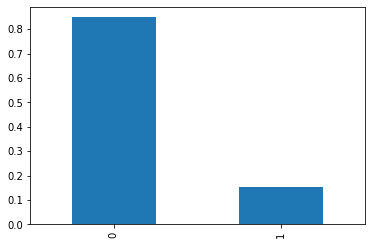

In [20]:
#if any sort of sorting is done on data we want shuffle the data here 1 means 100 percent or all
df['TenYearCHD'].value_counts()
#normalize gives u proportion
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')


In [21]:

#display only features that are missing
# df.isnull().sum()
ms=df.isnull().sum()
ms[ms>0]


education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

6.214948349534676

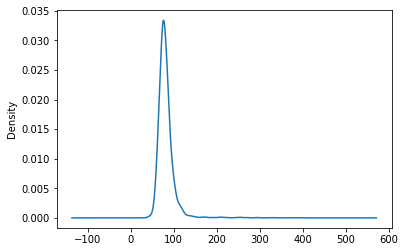

In [22]:
#befor imputation
df['glucose'].plot(kind='kde')
df['glucose'].skew()


In [23]:
df=df.fillna(method='ffill')

6.2396903715375975

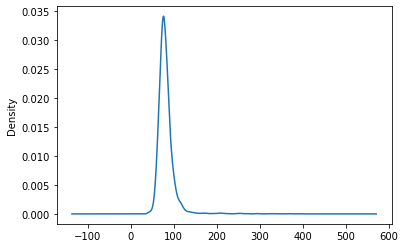

In [24]:
df['glucose'].plot(kind='kde')
df['glucose'].skew()

In [25]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [28]:
print(X_train.shape,X_test.shape)

(2968, 15) (1272, 15)


In [29]:
from sklearn.linear_model import LogisticRegression
# if solver not gieven it might give some wornings related to solver
lr=LogisticRegression(fit_intercept=True,solver='liblinear')

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_train_predict=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)
y_train_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
# GIves positive and negative values
y_train_prob

array([[0.90618998, 0.09381002],
       [0.94311011, 0.05688989],
       [0.86481504, 0.13518496],
       ...,
       [0.73037875, 0.26962125],
       [0.25581629, 0.74418371],
       [0.95469585, 0.04530415]])

In [38]:
y_train_prob=y_train_prob[:,1]

In [39]:
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

Overall Accuracy -Train 0.8608490566037735
Confusion matrix-Train 
 [[2520   13]
 [ 400   35]]
AUC - Train 0.7313212718551896


In [40]:
y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

In [43]:
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Overall Accuracy -Test 0.8404088050314465
Confusion matrix-Test 
 [[1060    3]
 [ 200    9]]
AUC - Test 0.699491823718194


In [45]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

Text(0, 0.5, 'TPR')

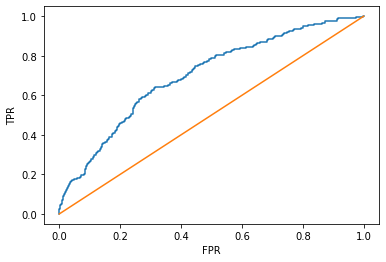

In [46]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
